In [1]:
import numpy as np
import matplotlib.pyplot as plot

from IPython.display import display, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interactive

from moviepy.editor import VideoClip

from wmse import *

In [ ]:
def differential_curve(model, plot_name, t1, t2, dt=0.01):
    theta = []
    for t in np.arange(t1, t2, dt):
        theta = model. 

In [7]:
deltaS = 1.0
th_len, tb_len, b1_len, con_len, b2_len, hh_len = 1, 8, 1, 3, 1, 1
segments = [-0.5]
for seg in [th_len, tb_len, b1_len, con_len, b2_len, hh_len]:
    segments += [segments[-1] + seg] 

TAIL_HEAD_SEGMENT = WMSESegment(th_len, 0.0, 0.0, deltaS, tail)
TAIL_BODY_SEGMENT = WMSESegment(tb_len, 0.0, 0.0, deltaS, body)
BODY_1_SEGMENT    = WMSESegment(b1_len, 1.0, 0.0, deltaS, body)
CON_SEGMENT       = WMSESegment(con_len, 1.0, 1.0, deltaS, body)
BODY_2_SEGMENT    = WMSESegment(b2_len, 1.0, 0.0, deltaS, body)
HEAD_HEAD_SEGMENT = WMSESegment(hh_len, 1.0, 0.0, deltaS, head)

model = WMSEBetaWave([TAIL_HEAD_SEGMENT, TAIL_BODY_SEGMENT, BODY_1_SEGMENT,
                     CON_SEGMENT, BODY_2_SEGMENT, HEAD_HEAD_SEGMENT], 2)

In [8]:
def see_map(t):
    probability_map = model.get_bond_probability_map(t)
    fig = plot.figure(figsize=(8, 6))
    plot.imshow(probability_map, aspect='auto', vmax=1.0, vmin=0.0)
    plot.title('temperature = %.3f' % t)
    plot.yticks(range(3), [['<-', '->'][i%2] for i in range(3)])
    plot.xticks(segments[1:], ['+']*(len(segments) - 1))
    plot.colorbar()
    plot.suptitle('1-element-connection')
    fig.canvas.draw()
    image = np.array(fig.canvas.renderer._renderer)[:,:,:-1] 
    return image


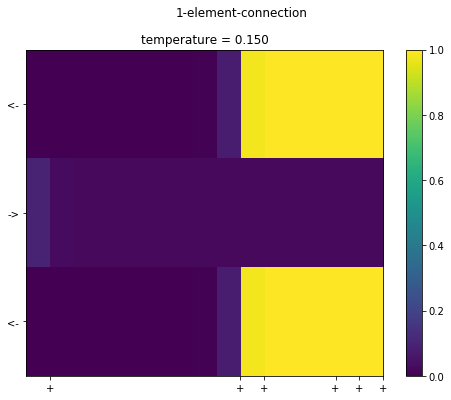

<function __main__.interactive_plot>

In [9]:
def interactive_plot(t):
    see_map(t)
    plot.show()

interact(interactive_plot, t = (0.1, 0.2, 0.001))

In [10]:
def render_frame(t):
    image = see_map(t)

    plot.close()
    return image
    
animation = VideoClip(lambda x: render_frame(0.05 + x*0.01), duration = 15.0)
animation.write_videofile('3-element-connection-s-1.mp4', fps=24)
print 'fine'

[MoviePy] >>>> Building video 3-element-connection-s-1.mp4
[MoviePy] Writing video 3-element-connection-s-1.mp4


100%|██████████████████████████████████████████▉| 360/361 [01:36<00:00,  2.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: 3-element-connection-s-1.mp4 

fine
